# **Pratik Diyewar**
### "I am working on a Natural Language Processing (NLP) project where I review headlines and assign labels indicating whether they are positive or negative. The output includes 1s and 0s corresponding to the sentiment labels."

Data Gathering

In [ ]:
import pandas as pd
df= pd.read_csv('/content/drive/MyDrive/Dataset/news.csv')
df

,Headline,Label
0,Four ways Bob Corker skewered Donald Trump,1
1,Linklater's war veteran comedy speaks to moder...,1
2,Trump’s Fight With Corker Jeopardizes His Legi...,1
3,Egypt's Cheiron wins tie-up with Pemex for Mex...,1
4,Jason Aldean opens 'SNL' with Vegas tribute,1
...,...,...
4004,Trends to Watch,0
4005,Trump Jr. Is Soon To Give A 30-Minute Speech F...,0
4006,"Ron Paul on Trump, Anarchism & the AltRight",0
4007,China to accept overseas trial data in bid to ...,1


<Axes: title={'center': 'Label'}, ylabel='Frequency'>

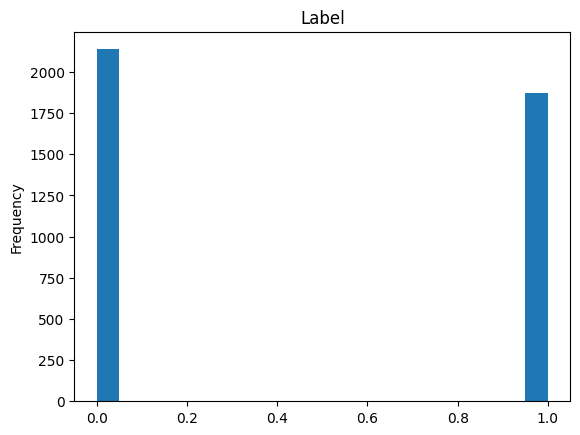

In [ ]:
from matplotlib import pyplot as plt
df['Label'].plot(kind='hist', bins=20, title='Label')

# EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Headline  4009 non-null   object
 1   Label     4009 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 62.8+ KB


In [ ]:
df.head()

,Headline,Label
0,Four ways Bob Corker skewered Donald Trump,1
1,Linklater's war veteran comedy speaks to moder...,1
2,Trump’s Fight With Corker Jeopardizes His Legi...,1
3,Egypt's Cheiron wins tie-up with Pemex for Mex...,1
4,Jason Aldean opens 'SNL' with Vegas tribute,1


In [ ]:
df.tail()

,Headline,Label
4004,Trends to Watch,0
4005,Trump Jr. Is Soon To Give A 30-Minute Speech F...,0
4006,"Ron Paul on Trump, Anarchism & the AltRight",0
4007,China to accept overseas trial data in bid to ...,1
4008,Vice President Mike Pence Leaves NFL Game Beca...,0


In [ ]:
df.isna().sum()

Headline    0
Label       0
dtype: int64

In [ ]:
df.describe()

,Label
count,4009.000000
mean,0.466949
std,0.498969
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


# Preprocessing of data[df]

In [ ]:
import re   #Regularization

In [ ]:
pre=[]
for i in df['Headline']:
  h=i.lower()
  h1= re.sub('[^a-z]',' ',h)         # Removing the punctuation marks and replace with empty space.
  pre.append(h1)

In [ ]:
pre[0:5]

['four ways bob corker skewered donald trump',
 'linklater s war veteran comedy speaks to modern america  says star',
 'trump s fight with corker jeopardizes his legislative agenda',
 'egypt s cheiron wins tie up with pemex for mexican onshore oil field',
 'jason aldean opens  snl  with vegas tribute']

In [ ]:
df['Headline_1']=pre             # add the updated col. to the data[df]

In [ ]:
df

,Headline,Label,Headline_1
0,Four ways Bob Corker skewered Donald Trump,1,four ways bob corker skewered donald trump
1,Linklater's war veteran comedy speaks to moder...,1,linklater s war veteran comedy speaks to moder...
2,Trump’s Fight With Corker Jeopardizes His Legi...,1,trump s fight with corker jeopardizes his legi...
3,Egypt's Cheiron wins tie-up with Pemex for Mex...,1,egypt s cheiron wins tie up with pemex for mex...
4,Jason Aldean opens 'SNL' with Vegas tribute,1,jason aldean opens snl with vegas tribute
...,...,...,...
4004,Trends to Watch,0,trends to watch
4005,Trump Jr. Is Soon To Give A 30-Minute Speech F...,0,trump jr is soon to give a minute speech f...
4006,"Ron Paul on Trump, Anarchism & the AltRight",0,ron paul on trump anarchism the altright
4007,China to accept overseas trial data in bid to ...,1,china to accept overseas trial data in bid to ...


# Define x and y

In [ ]:
x=df['Headline_1']
y=df['Label']

In [ ]:
x

0              four ways bob corker skewered donald trump
1       linklater s war veteran comedy speaks to moder...
2       trump s fight with corker jeopardizes his legi...
3       egypt s cheiron wins tie up with pemex for mex...
4             jason aldean opens  snl  with vegas tribute
                              ...                        
4004                                      trends to watch
4005    trump jr  is soon to give a    minute speech f...
4006          ron paul on trump  anarchism   the altright
4007    china to accept overseas trial data in bid to ...
4008    vice president mike pence leaves nfl game beca...
Name: Headline_1, Length: 4009, dtype: object

In [ ]:
y

0       1
1       1
2       1
3       1
4       1
       ..
4004    0
4005    0
4006    0
4007    1
4008    0
Name: Label, Length: 4009, dtype: int64

# Vectorization

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tf=TfidfVectorizer()

In [ ]:
x1=tf.fit_transform(x).toarray()
x1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Split the data

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.23,random_state=34)

# Model building

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,BatchNormalization,Dropout

In [ ]:
sn=Sequential()

In [ ]:
sn.add(Dense(1000,input_dim=x_train.shape[1],activation ='relu'))                 #input
sn.add(BatchNormalization())

sn.add(Dense(1050,activation='relu'))                                             #hidden
sn.add(BatchNormalization())
sn.add(Dropout(0.2))

sn.add(Dense(1040,activation='relu'))                                             #hidden
sn.add(BatchNormalization())
sn.add(Dropout(0.2))

sn.add(Dense(1030,activation='relu'))                                             #hidden
sn.add(BatchNormalization())
sn.add(Dropout(0.2))

sn.add(Dense(1,activation='sigmoid'))                                             #output

# Compile the model

In [ ]:
sn.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# Callbacks

In [ ]:
from keras.callbacks import EarlyStopping

Early=EarlyStopping(monitor='val_loss',patience=8)

# Fitting the models

In [ ]:
hist=sn.fit(x_train,y_train,validation_split=0.2,callbacks=[Early],epochs=77)

Epoch 1/77
78/78 [==============================] - 23s 206ms/step - loss: 0.9564 - accuracy: 0.6799 - val_loss: 0.6851 - val_accuracy: 0.5210
Epoch 2/77
78/78 [==============================] - 16s 206ms/step - loss: 0.1919 - accuracy: 0.9315 - val_loss: 0.6663 - val_accuracy: 0.5388
Epoch 3/77
78/78 [==============================] - 16s 199ms/step - loss: 0.0588 - accuracy: 0.9806 - val_loss: 0.5660 - val_accuracy: 0.8301
Epoch 4/77
78/78 [==============================] - 14s 184ms/step - loss: 0.0199 - accuracy: 0.9923 - val_loss: 0.5972 - val_accuracy: 0.6424
Epoch 5/77
78/78 [==============================] - 15s 194ms/step - loss: 0.0234 - accuracy: 0.9939 - val_loss: 0.5164 - val_accuracy: 0.7362
Epoch 6/77
78/78 [==============================] - 16s 208ms/step - loss: 0.0257 - accuracy: 0.9907 - val_loss: 0.4229 - val_accuracy: 0.8058
Epoch 7/77
78/78 [==============================] - 15s 189ms/step - loss: 0.0591 - accuracy: 0.9822 - val_loss: 0.4387 - val_accuracy: 0.8107

# Plot the result

In [ ]:
import matplotlib.pyplot as plt

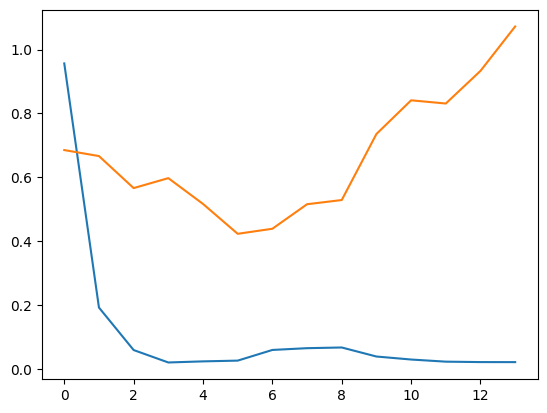

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

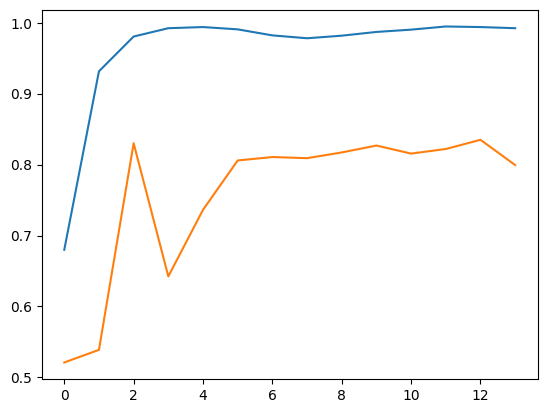

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

# Evaluation

In [ ]:
# Training Data

y_pred_train=sn.predict(x_train)
y_pred_train

97/97 [==============================] - 3s 25ms/step


array([[9.9992889e-01],
       [8.7937056e-05],
       [9.9996185e-01],
       ...,
       [7.1499650e-03],
       [6.2426352e-07],
       [9.5218620e-06]], dtype=float32)

In [ ]:
y_pred_tr=[]

for i in y_pred_train:
    if i>0.5:
        y_pred_tr.append(1)
    else:
        y_pred_tr.append(0)

In [ ]:
y_pred_tr

[1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,


In [ ]:
y_train

2712    1
3771    0
1461    1
1174    0
1558    1
       ..
3830    1
1897    1
2538    0
1146    1
3489    0
Name: Label, Length: 3086, dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
# Evaluation of training data

acc= accuracy_score(y_pred_tr,y_train)
clf= classification_report(y_pred_tr,y_train)
cnf= confusion_matrix(y_pred_tr,y_train)
print('Accuracy:',acc)
print('Classification Report:\n',clf)
print('Confusion Matrix', cnf)

Accuracy: 0.9526895657809462
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.96      1697
           1       0.93      0.97      0.95      1389

    accuracy                           0.95      3086
   macro avg       0.95      0.95      0.95      3086
weighted avg       0.95      0.95      0.95      3086

Confusion Matrix [[1599   98]
 [  48 1341]]


In [ ]:
# TEstting data
y_pred_test=sn.predict(x_test)
y_pred_test

29/29 [==============================] - 1s 24ms/step


array([[6.33763308e-09],
       [9.99476790e-01],
       [9.81312931e-01],
       [5.22119876e-07],
       [9.99711454e-01],
       [1.22277037e-04],
       [4.23828155e-01],
       [9.69228506e-01],
       [9.99885261e-01],
       [2.27162436e-05],
       [9.27215695e-01],
       [1.00000000e+00],
       [2.01061295e-04],
       [9.98047531e-01],
       [8.43148604e-02],
       [2.25955795e-04],
       [5.88330328e-01],
       [8.85999839e-07],
       [6.09673038e-02],
       [8.23954120e-03],
       [9.98545229e-01],
       [3.29180837e-01],
       [9.97635245e-01],
       [2.08910578e-08],
       [2.81354325e-04],
       [3.31492010e-05],
       [4.53158421e-03],
       [4.60752249e-01],
       [3.89829546e-01],
       [4.68064536e-06],
       [1.23186701e-05],
       [5.49798249e-04],
       [9.99999762e-01],
       [6.90848424e-07],
       [3.79993367e-06],
       [4.43662643e-01],
       [3.24200082e-05],
       [5.85505545e-01],
       [9.80765402e-01],
       [9.99999583e-01],


Evalution on testing data

In [ ]:
y_pred_ts=[]

for i in y_pred_test:
    if i>0.5:
        y_pred_ts.append(1)
    else:
        y_pred_ts.append(0)

In [ ]:
y_pred_ts

[0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,


In [ ]:
# Evaltuion On testing data
acc1= accuracy_score(y_pred_ts,y_test)
clf1= classification_report(y_pred_ts,y_test)
cnf1= confusion_matrix(y_pred_ts,y_test)
print('Accuracy:',acc1)
print('Classification Report:\n',clf1)
print('Confusion Matrix', cnf1)

Accuracy: 0.8266522210184182
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.82      0.84       510
           1       0.79      0.83      0.81       413

    accuracy                           0.83       923
   macro avg       0.82      0.83      0.83       923
weighted avg       0.83      0.83      0.83       923

Confusion Matrix [[420  90]
 [ 70 343]]


# Unseen data

In [ ]:
text=input('Enter the HeadLine: ')
h=text.lower()
h1=re.sub('[^a-z]',' ',h)

h2=tf.transform([h1]).toarray()

prob=sn.predict(h2)
print('Given Probability:',prob)

if prob>0.5:
    print('This is Positive Headline','\n [ 1 ]')
else:
    print('This is Negative Headline  ','\n [ 0 ]')

Enter the HeadLine: One person was killed and parcels worth lakhs of rupees were destroyed .
1/1 [==============================] - 0s 28ms/step
Given Probability: [[2.5470581e-05]]
This is Negative Headline   
 [0]
